In [1]:
import cv2, os
import h5py

from skimage import io
import numpy as np
from tqdm import tqdm 
from matplotlib import pyplot as plt

# Load and Save as numpy

In [17]:
def save_all_images_to_one_numpy_file(CHIP, TYPE):
    image_path = f"/groups/4/gaa50089/acd13264yb/Datasets/240420Rettsyndrome/SingleCell/{CHIP}/{TYPE}"
    output_file = f"/groups/4/gaa50089/acd13264yb/Rettsyndrome/Classification/Datasets/{CHIP}_{TYPE}.npy"
    
    images = []

    for filename in os.listdir(image_path):
        file_path = os.path.join(image_path, filename)
        
        if filename.endswith(('.jpg', '.jpeg', '.png', '.tif')):
            image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
            if image is not None:
                images.append(image)
    print(len(images))
         
    return images


def save_images_to_hdf5(image_path, output_file):
    with h5py.File(output_file, 'w') as f:
        for idx, filename in enumerate(os.listdir(image_path)):
            file_path = os.path.join(image_path, filename)
            if filename.endswith(('.jpg', '.jpeg', '.png', '.tif')):
                image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
                if image is not None:
                    f.create_dataset(f"image_{idx}", data=image)

In [23]:
# Data_Ctrl = save_all_images_to_one_numpy_file("All", "CTRL")
Data_Rett = save_all_images_to_one_numpy_file("All", "RETT_HPS3084")

1332


In [82]:
# def title(label):
#     if label==0:
#         return "untreated"
#     else:
#         return "VPA-treated"
# img = X_Ctrl[23]
# b,g,r=cv2.split(img)
# r,g,b=r/r.max(),g/g.max(),b/b.max()
# img=cv2.merge((r,g,b))
# zero=np.zeros([600,600])
# plt.figure(figsize=(20,20))
# plt.subplots_adjust(wspace=0.02, hspace=0.02)
# plt.subplot(1,4,1)
# plt.axis("off")
# plt.imshow(img/img.max())
# plt.subplot(1,4,2)
# plt.axis("off")
# plt.imshow(cv2.merge([r,zero,zero]))
# plt.subplot(1,4,3)
# plt.axis("off")
# plt.imshow(cv2.merge([zero,g,zero]))
# plt.subplot(1,4,4)
# plt.axis("off")
# plt.imshow(cv2.merge([zero,zero,b]))

# img = X_VPA[19]
# b,g,r=cv2.split(img)
# r,g,b=r/r.max(),g/g.max(),b/b.max()
# img=cv2.merge((r,g,b))
# plt.figure(figsize=(20,20))
# plt.subplots_adjust(wspace=0.02, hspace=0.02)
# plt.subplot(1,4,1)
# plt.axis("off")
# plt.imshow(img/img.max())
# plt.subplot(1,4,2)
# plt.axis("off")
# plt.imshow(cv2.merge([r,zero,zero]))
# plt.subplot(1,4,3)
# plt.axis("off")
# plt.imshow(cv2.merge([zero,g,zero]))
# plt.subplot(1,4,4)
# plt.axis("off")
# plt.imshow(cv2.merge([zero,zero,b]))

*********

# Image size counter

In [10]:
max_x = max_y = max_xi = max_yi = 0
for i in range(len(Data_Ctrl)):
    if max_x != max(max_x, Data_Ctrl[i].shape[0]):
        max_x = max(max_x, Data_Ctrl[i].shape[0])
        max_xi = i
    if max_y != max(max_y, Data_Ctrl[i].shape[1]):
        max_y = max(max_y, Data_Ctrl[i].shape[1])
        max_yi = i
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.title(f"max xi {str(max_xi)}, max x {max_x}")
plt.imshow(Data_Ctrl[max_xi])
plt.subplot(1,2,2)
plt.title(f"max yi {str(max_yi)}, max y {max_y}")
plt.imshow(Data_Ctrl[max_yi])
plt.show()

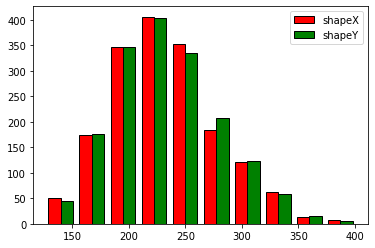

In [83]:
shapeX=[]
shapeY=[]
for i in range(len(Data_Ctrl)):
    shapeX.append(Data_Ctrl[i].shape[0])
    shapeY.append(Data_Ctrl[i].shape[1])
fig, ax = plt.subplots()
ax.hist([shapeX,shapeY], label=["shapeX", "shapeY"], color=["r", "g"], ec="k",range=[min(min(shapeX,shapeY)),max(max(shapeX,shapeY))])
ax.legend()

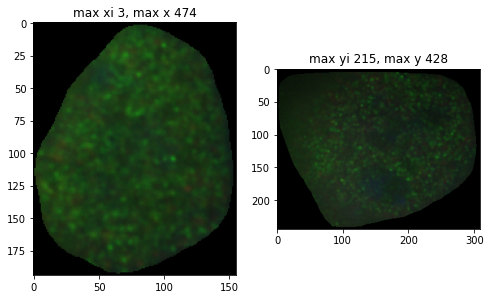

In [100]:
max_x = max_y = max_xi = max_yi = 0
for i in range(len(Data_Rett)):
    if max_x != max(max_x, Data_Rett[i].shape[0]):
        max_x = max(max_x, Data_Rett[i].shape[0])
        max_xi = i
    if max_y != max(max_y, Data_Rett[i].shape[1]):
        max_y = max(max_y, Data_Rett[i].shape[1])
        max_yi = i
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.title(f"max xi {str(max_xi)}, max x {max_x}")
plt.imshow(Data_Ctrl[max_xi])
plt.subplot(1,2,2)
plt.title(f"max yi {str(max_yi)}, max y {max_y}")
plt.imshow(Data_Ctrl[max_yi])
plt.show()

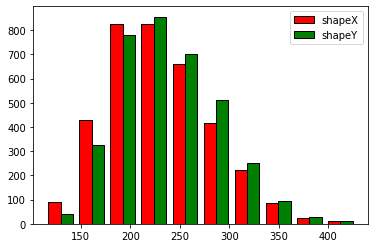

In [101]:
shapeX=[]
shapeY=[]
for i in range(len(Data_Rett)):
    shapeX.append(Data_Rett[i].shape[0])
    shapeY.append(Data_Rett[i].shape[1])
fig, ax = plt.subplots()
ax.hist([shapeX,shapeY], label=["shapeX", "shapeY"], color=["r", "g"], ec="k",range=[min(min(shapeX,shapeY)),max(max(shapeX,shapeY))])
ax.legend()

# Unify image size (Padding)

In [11]:
Max_shape_0=500
Max_shape_1=500

def datapadding(img):
    imgSize = img.shape
    top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2
    left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2
    if (imgSize[0] % 2) != 0:
        top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2+1
    if (imgSize[1] % 2) != 0:     
        left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2+1
    img_pad = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=(0,0,0))
    return img_pad

In [24]:
# final_01=[]
# for n in range(len(Data_Ctrl)):
#     img = Data_Ctrl[n]
#     final_01.append(datapadding(img))
# final_01=np.array(final_01)
# print(final_01.shape)


final_02=[]
for n in range(len(Data_Rett)):
    img = Data_Rett[n]
    final_02.append(datapadding(img))
final_02=np.array(final_02)
print(final_02.shape)

# np.save("./Datasets/All_CTRL.npy",final_01)
np.save("./Datasets/RETT_HPS3084_All.npy",final_02)

(1332, 500, 500, 3)


# Split each Channel

In [25]:
# Data_Ctrl=np.load("./Datasets/All_CTRL.npy",allow_pickle=True)
Data_Rett=np.load("./Datasets/RETT_HPS3084_All.npy",allow_pickle=True)

# print("Data_Ctrl.shape:", Data_Ctrl.shape, " dtype: ", Data_Ctrl.dtype)
print("Data_Rett.shape:", Data_Rett.shape, " dtype: ", Data_Rett.dtype)

Data_Rett.shape: (1332, 500, 500, 3)  dtype:  uint8


In [127]:
CTRL_H3K27ac = []
CTRL_CTCF = []
CTRL_Dapi = []
for img in Data_Ctrl:
    img_H3K27ac = img[:,:,0]
    img_CTCF = img[:,:,1]
    img_Dapi = img[:,:,2]
    img_H3K27ac = cv2.merge([img_H3K27ac,img_H3K27ac,img_H3K27ac])
    img_CTCF = cv2.merge([img_CTCF,img_CTCF,img_CTCF])
    img_Dapi = cv2.merge([img_Dapi,img_Dapi,img_Dapi])
    CTRL_H3K27ac.append(img_H3K27ac)
    CTRL_CTCF.append(img_CTCF)
    CTRL_Dapi.append(img_Dapi)
    
np.save("./Datasets/CTRL_H3K27ac.npy", np.array(CTRL_H3K27ac))
np.save("./Datasets/CTRL_CTCF.npy", np.array(CTRL_CTCF))
np.save("./Datasets/CTRL_Dapi.npy", np.array(CTRL_Dapi))

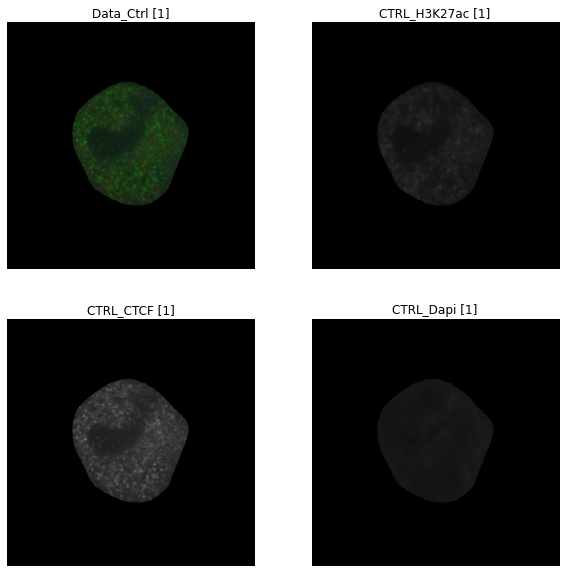

In [128]:
index = 1
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title(f"Data_Ctrl [{index}]")
plt.axis("off")
plt.imshow(Data_Ctrl[index])

plt.subplot(2,2,2)
plt.title(f"CTRL_H3K27ac [{index}]")
plt.axis("off")
plt.imshow(CTRL_H3K27ac[index])

plt.subplot(2,2,3)
plt.title(f"CTRL_CTCF [{index}]")
plt.axis("off")
plt.imshow(CTRL_CTCF[index])

plt.subplot(2,2,4)
plt.title(f"CTRL_Dapi [{index}]")
plt.axis("off")
plt.imshow(CTRL_Dapi[index])

In [26]:
RETT_H3K27ac = []
RETT_CTCF = []
RETT_Dapi = []
for img in Data_Rett:
    img_H3K27ac = img[:,:,0]
    img_CTCF = img[:,:,1]
    img_Dapi = img[:,:,2]
    
    img_H3K27ac = cv2.merge([img_H3K27ac,img_H3K27ac,img_H3K27ac])
    img_CTCF = cv2.merge([img_CTCF,img_CTCF,img_CTCF])
    img_Dapi = cv2.merge([img_Dapi,img_Dapi,img_Dapi])
    
    RETT_H3K27ac.append(img_H3K27ac)
    RETT_CTCF.append(img_CTCF)
    RETT_Dapi.append(img_Dapi)
    
np.save("./Datasets/RETT_HPS3084_H3K27ac.npy", np.array(RETT_H3K27ac))
np.save("./Datasets/RETT_HPS3084_CTCF.npy", np.array(RETT_CTCF))
np.save("./Datasets/RETT_HPS3084_Dapi.npy", np.array(RETT_Dapi))

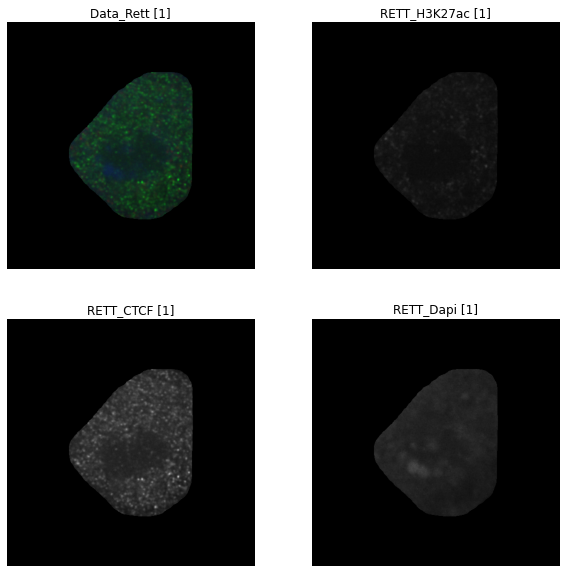

In [130]:
index = 1
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title(f"Data_Rett [{index}]")
plt.axis("off")
plt.imshow(Data_Rett[index])

plt.subplot(2,2,2)
plt.title(f"RETT_H3K27ac [{index}]")
plt.axis("off")
plt.imshow(RETT_H3K27ac[index])

plt.subplot(2,2,3)
plt.title(f"RETT_CTCF [{index}]")
plt.axis("off")
plt.imshow(RETT_CTCF[index])

plt.subplot(2,2,4)
plt.title(f"RETT_Dapi [{index}]")
plt.axis("off")
plt.imshow(RETT_Dapi[index])